Mirabelle El Chalfoun

Accuracy: 0.5062879470291644
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.51      0.67     83983
           1       0.02      0.58      0.04      1498

    accuracy                           0.51     85481
   macro avg       0.50      0.54      0.35     85481
weighted avg       0.97      0.51      0.66     85481



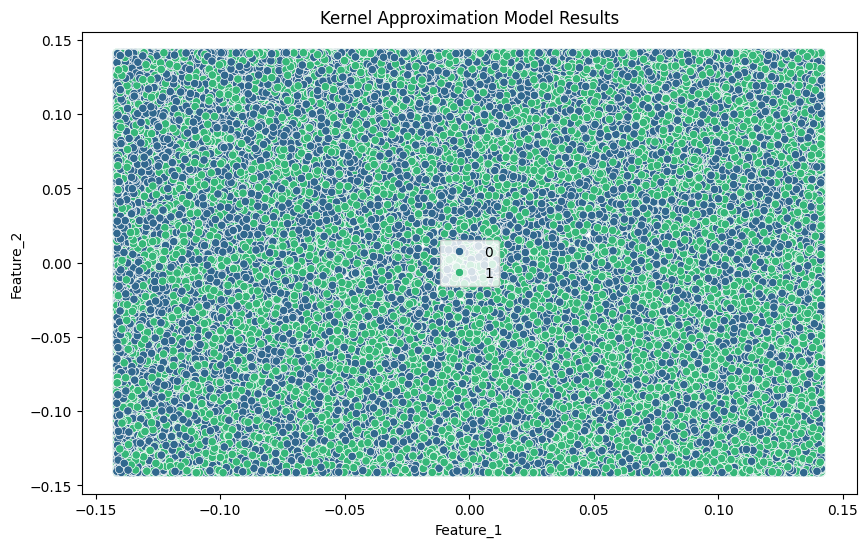

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier, LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

# Loading the data
data = pd.read_csv('data/new_sm_train.csv')

# Dropping ID columns
data = data.drop(columns=['customer_id', 'vendor_id'])

# Fixed missing values in the data, this section is no longer needed.
# Replacing infinity values with NaN and then filling NaN values with the column mean
# data.replace([np.inf,-np.inf],np.nan,inplace=True)
# numeric_cols = data.select_dtypes(include=[np.number]).columns
# data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Splitting the data into features and target
X = data.drop(columns=['target'])
y = data['target']

# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Standardizing the features
# Uncomment to use standardization
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Applying RBF kernel approximation
rbf_feature = RBFSampler(gamma=1)
X_train_features = rbf_feature.fit_transform(X_train)
X_test_features = rbf_feature.transform(X_test)

# Training a linear classifier
clf = SGDClassifier(class_weight='balanced')
clf.fit(X_train_features,y_train)

# Predicting and evaluating the model
y_pred = clf.predict(X_test_features)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred, zero_division=1)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Visualizing of the results
plt.figure(figsize=(10 ,6))
sns.scatterplot(x=X_test_features[:,0], y=X_test_features[:,1], hue=y_pred,palette='viridis')
plt.title('Kernel Approximation Model Results')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

Adapted from hist_grad

In [ ]:
# from sklearn.utils import resample, shuffle
# import pandas as pd
# import numpy as np


# ##------------Undersampling the Majority-----------------##
# # Concatenate X and y for easy manipulation
# balanced_data = data

# # Separate the two classes
# class_0 = balanced_data[balanced_data['target'] == 0]
# class_1 = balanced_data[balanced_data['target'] == 1]

# # Undersample the majority class (0)
# class_0_undersampled = resample(class_0, replace=False, n_samples=len(class_1), random_state=42)

# # Combine the minority class and the undersampled majority class
# balanced_data_undersampled = pd.concat([class_0_undersampled, class_1])

# # Shuffle the dataset
# balanced_data_undersampled = balanced_data_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# # Prepare X and y
# X = balanced_data_undersampled.drop(columns=['target'])
# y = balanced_data_undersampled['target']

# # Train and fit, print accuracy and classification report
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardizing the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Applying RBF kernel approximation
# rbf_feature = RBFSampler(gamma=1)
# X_train_features = rbf_feature.fit_transform(X_train_scaled)
# X_test_features = rbf_feature.transform(X_test_scaled)

# # Training a linear classifier
# clf = SGDClassifier()
# clf.fit(X_train_features,y_train)

# y_pred = clf.predict(X_test_features)
# accuracy = accuracy_score(y_test,y_pred)
# report = classification_report(y_test,y_pred, zero_division=1)
# print(f"Accuracy: {accuracy}")
# print(f"Classification Report:\n{report}")

# majority_class = balanced_data[balanced_data['target'] == 0]
# minority_class = balanced_data[balanced_data['target'] == 1]

# # Shuffle the majority class
# majority_class_shuffled = shuffle(majority_class, random_state=42)

# minority_class_size = len(minority_class)

# # Calculate number of splits needed to cover the majority class
# num_splits = len(majority_class) // minority_class_size

# # Initialize lists to store evaluation results
# precision_list = []
# recall_list = []
# f1_list = []

# model = SGDClassifier()

# # Loop to perform different splits of the majority class
# for i in range(num_splits):
#     # Select the subset of the majority class for this split
#     start_idx = i * minority_class_size
#     end_idx = (i + 1) * minority_class_size
#     majority_split = majority_class_shuffled.iloc[start_idx:end_idx]
    
#     # Combine the majority split with the full minority class
#     balanced_data = pd.concat([majority_split, minority_class], axis=0)
    
#     # Split into features (X) and target (y)
#     X = balanced_data.drop(columns=['target'])
#     y = balanced_data['target']
    
#     # Split the dataset into train and test sets (80% training, 20% testing)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Standardizing the features
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     # Applying RBF kernel approximation
#     rbf_feature = RBFSampler(gamma=1)
#     X_train_features = rbf_feature.fit_transform(X_train_scaled)
#     X_test_features = rbf_feature.transform(X_test_scaled)

#     # Training a linear classifier
#     clf = SGDClassifier()
#     clf.fit(X_train_features,y_train)
    
#     # Make predictions
#     y_pred = clf.predict(X_test_features)
    
#     # Store the classification report for evaluation
#     eval_report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
#     precision_list.append(eval_report['1']['precision'])
#     recall_list.append(eval_report['1']['recall'])
#     f1_list.append(eval_report['1']['f1-score'])

# # Calculate the average for each metric
# avg_precision = np.mean(precision_list)
# avg_recall = np.mean(recall_list)
# avg_f1 = np.mean(f1_list)

# # Print the averages
# print(f"Average Precision for Class 1: {avg_precision:.3f}")
# print(f"Average Recall for Class 1: {avg_recall:.3f}")
# print(f"Average F1-Score for Class 1: {avg_f1:.3f}")

Accuracy: 0.6525043177892919
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1448
           1       0.67      0.60      0.63      1447

    accuracy                           0.65      2895
   macro avg       0.65      0.65      0.65      2895
weighted avg       0.65      0.65      0.65      2895

Average Precision for Class 1: 0.659
Average Recall for Class 1: 0.634
Average F1-Score for Class 1: 0.643
